# Time-varying invariant set for damped pendulum under PID control following a smooth reference trajectory

In [1]:
from matplotlib import pyplot as plt
import sympy as sp
from sympy import Matrix
import numpy as np
from IPython.display import Math
from scipy.optimize import fminbound
import cvxpy as cp
from matplotlib.patches import Ellipse
import matplotlib.patches as mpatches

## Modelica model definition

In [2]:
model pendulum_pid_io "Damped pendulum with PID ref and disturbance as inputs"
  // --- Plant parameters ---
  parameter Real m = 1.0 "Mass";
  parameter Real l = 1.0 "Length of pendulum";
  parameter Real g = 9.81 "Gravitational acceleration";
  parameter Real c = 0.1 "Damping coefficient";

  // --- PID parameters ---
  parameter Real Kp = 5.0 "Proportional gain";
  parameter Real Ki = 1.0 "Integral gain";
  parameter Real Kd = 0.5 "Derivative gain";

  // --- I/O ---
  input Real theta_ref "Reference angle";
  input Real dtheta_ref "Reference angular rate";
  input Real ddtheta_ref "Reference angular acceleration";
  input Real d = 0 "Additive disturbance torque";

  // --- States ---
  Real theta "Angle";
  Real omega "Angular rate";
  Real xi "Integral of angle error";

  // --- Internal ---
  Real e "Angle error";
  Real u "Control torque";
  // (ADDED) feedforward torque:
  Real u_ff "Feedforward torque from reference";

equation
  // Plant
  der(theta) = omega;
  der(omega) = -(g/l)*sin(theta) - c/(m*l^2)*omega + (u + d)/(m*l^2);

  // PID (derivative on measurement, filtered)
  e = theta_ref - theta;
  der(xi) = e;

  // (ADDED) feedforward from reference dynamics
  u_ff = m*l^2*ddtheta_ref + c*dtheta_ref + m*g*l*sin(theta_ref);

  // Sum feedforward + existing PID correction
  u = u_ff + (Kp*e + Ki*xi - Kd*omega);
end pendulum_pid_io;


SyntaxError: invalid syntax (77893649.py, line 1)

## Rumoca sympy output

In [3]:
"""
Automatically generated by Rumoca
"""
import sympy
from sympy import Matrix, ImmutableDenseMatrix, Piecewise, Tuple
import numpy as np
import scipy.integrate

cos = sympy.cos
sin = sympy.sin
tan = sympy.tan


def flatten_piecewise_with_nested_matrices(matrix):
    assert isinstance(matrix, (Matrix, ImmutableDenseMatrix, Tuple)), "Input must be a Matrix object or Tuple"
    piecewise = sympy.piecewise_fold(sympy.Piecewise((matrix, True)))

    if isinstance(piecewise, (Matrix, ImmutableDenseMatrix, Tuple)):
        return piecewise

    def flatten_matrix(matrix):
        """Recursively flatten nested matrices."""
        if isinstance(matrix, (Matrix, ImmutableDenseMatrix, Tuple)):
            flattened = []
            for elem in matrix:
                if isinstance(elem, (Matrix, ImmutableDenseMatrix, Tuple)):
                    flattened.extend(flatten_matrix(elem))
                else:
                    flattened.append(elem)
            return Matrix(flattened)
        return matrix

    flattened_conditions = []
    for expr, cond in piecewise.args:
        flattened_expr = flatten_matrix(expr) if isinstance(expr, (Matrix, ImmutableDenseMatrix, Tuple)) else expr
        flattened_conditions.append((flattened_expr, cond))
    return sympy.piecewise_exclusive(Piecewise(*flattened_conditions))


class Model:
    """
    Flattened Modelica Model
    """

    def __init__(self):
        # ============================================
        # Initialize
        self.solved = False

        # ============================================
        # Declare time
        time = sympy.symbols('time')
        self.time = time

        # ============================================
        # Declare u
        theta_ref = sympy.symbols('theta_ref')
        dtheta_ref = sympy.symbols('dtheta_ref')
        ddtheta_ref = sympy.symbols('ddtheta_ref')
        d = sympy.symbols('d')
        self.u = sympy.Matrix([
            theta_ref,
            dtheta_ref,
            ddtheta_ref,
            d])
        self.u0 = { 
            'theta_ref': 0.0,
            'dtheta_ref': 0.0,
            'ddtheta_ref': 0.0,
            'd': 0.0}
        self.u_index = { 
            'theta_ref': 0,
            'dtheta_ref': 1,
            'ddtheta_ref': 2,
            'd': 3}
        self.u_index_rev = [ 
            'theta_ref',
            'dtheta_ref',
            'ddtheta_ref',
            'd']
        # ============================================
        # Declare p
        m = sympy.symbols('m')
        l = sympy.symbols('l')
        g = sympy.symbols('g')
        c = sympy.symbols('c')
        Kp = sympy.symbols('Kp')
        Ki = sympy.symbols('Ki')
        Kd = sympy.symbols('Kd')
        self.p = sympy.Matrix([
            m,
            l,
            g,
            c,
            Kp,
            Ki,
            Kd])
        self.p0 = { 
            'm': 0.0,
            'l': 0.0,
            'g': 0.0,
            'c': 0.0,
            'Kp': 0.0,
            'Ki': 0.0,
            'Kd': 0.0}
        self.p_index = { 
            'm': 0,
            'l': 1,
            'g': 2,
            'c': 3,
            'Kp': 4,
            'Ki': 5,
            'Kd': 6}
        self.p_index_rev = [ 
            'm',
            'l',
            'g',
            'c',
            'Kp',
            'Ki',
            'Kd']
        # ============================================
        # Declare c
        self.c = sympy.Matrix([])
        self.c0 = { }
        self.c_index = { }
        self.c_index_rev = [ ]
        # ============================================
        # Declare cp
        self.cp = sympy.Matrix([])
        self.cp0 = { }
        self.cp_index = { }
        self.cp_index_rev = [ ]
        # ============================================
        # Declare x
        theta = sympy.symbols('theta')
        omega = sympy.symbols('omega')
        xi = sympy.symbols('xi')
        self.x = sympy.Matrix([
            theta,
            omega,
            xi])
        self.x0 = { 
            'theta': 0.0,
            'omega': 0.0,
            'xi': 0.0}
        self.x_index = { 
            'theta': 0,
            'omega': 1,
            'xi': 2}
        self.x_index_rev = [ 
            'theta',
            'omega',
            'xi']
        # ============================================
        # Declare m
        self.m = sympy.Matrix([])
        self.m0 = { }
        self.m_index = { }
        self.m_index_rev = [ ]
        # ============================================
        # Declare y
        e = sympy.symbols('e')
        u = sympy.symbols('u')
        u_ff = sympy.symbols('u_ff')
        self.y = sympy.Matrix([
            e,
            u,
            u_ff])
        self.y0 = { 
            'e': 0.0,
            'u': 0.0,
            'u_ff': 0.0}
        self.y_index = { 
            'e': 0,
            'u': 1,
            'u_ff': 2}
        self.y_index_rev = [ 
            'e',
            'u',
            'u_ff']
        # ============================================
        # Declare z
        self.z = sympy.Matrix([])
        self.z0 = { }
        self.z_index = { }
        self.z_index_rev = [ ]
        

        # ============================================
        # Declare pre_x
        pre_theta = sympy.symbols('pre_theta')
        pre_omega = sympy.symbols('pre_omega')
        pre_xi = sympy.symbols('pre_xi')
        self.pre_x = sympy.Matrix([
            pre_theta,
            pre_omega,
            pre_xi])

        # ============================================
        # Declare pre_m
        self.pre_m = sympy.Matrix([])

        # ============================================
        # Declare pre_z
        self.pre_z = sympy.Matrix([])

        # ============================================
        # Declare x_dot
        der_theta = sympy.symbols('der_theta')
        der_omega = sympy.symbols('der_omega')
        der_xi = sympy.symbols('der_xi')
        self.x_dot = sympy.Matrix([
            der_theta,
            der_omega,
            der_xi])

        # ============================================
        # Define Continous Update Function: fx
        self.fx = sympy.Matrix([
            der_theta - (omega),
            der_omega - (((-(((g / l) * sin(theta))) - ((c / (m * (l ** 2.0))) * omega)) + ((u + d) / (m * (l ** 2.0))))),
            e - ((theta_ref - theta)),
            der_xi - (e),
            u_ff - (((((m * (l ** 2.0)) * ddtheta_ref) + (c * dtheta_ref)) + (((m * g) * l) * sin(theta_ref)))),
            u - ((u_ff + (((Kp * e) + (Ki * xi)) - (Kd * omega))))])
        self.fx = flatten_piecewise_with_nested_matrices(self.fx)

        # ============================================
        # Define Reset Functions: fr

        # ============================================
        # Define Condition Update Function: fc
        self.fc = sympy.Tuple(*[])
        self.f_c = sympy.lambdify(
            args=[self.time, self.x],
            expr=self.fc,
            modules=['numpy'])

        # ============================================
        # Events and Event callbacks

    def solve(self):
        # ============================================
        # Solve for explicit ODE
        v = sympy.Matrix(list(self.x_dot) + list(self.y))

        if isinstance(self.fx, sympy.Piecewise):
            sol_x_dot = []
            sol_y = []
            for arg in self.fx.args:
                condition = arg[1]
                sol_i = sympy.solve(arg[0], v)
                x_dot_i = sympy.Tuple(* [xi for xi in self.x_dot.subs(sol_i)])
                sol_x_dot.append((x_dot_i, condition))
                y_i = sympy.Tuple(* [yi for yi in self.y.subs(sol_i)])
                sol_y.append((y_i, condition))
            self.sol_x_dot = sympy.Piecewise(*sol_x_dot)
            self.sol_y = sympy.Piecewise(*sol_y)
        else:
            sol = sympy.solve(self.fx, v)
            self.sol_x_dot = sympy.Tuple(* [xi for xi in self.x_dot.subs(sol)])
            self.sol_y = sympy.Tuple(* [yi for yi in self.y.subs(sol)])
        
        self.f_x_dot = sympy.lambdify(
            args=[self.time, self.x, self.m, self.u, self.p, self.c],
            expr=self.sol_x_dot,
            modules=['numpy'])

        self.f_y = sympy.lambdify(
            args=[self.time, self.x, self.m, self.u, self.p, self.c],
            expr=self.sol_y,
            modules=['numpy'])

        self.solved = True

    def __repr__(self):
        return repr(self.__dict__)

    def simulate(self, t0, tf, dt, x0=None, f_u=None, max_events=100):
        """
        Simulate the modelica model
        """
        if not self.solved:
            self.solve()
        
        if f_u is None:
            def f_u(t):
                return np.zeros(self.u.shape[0])

        # ============================================
        # Declare initial vectors
        u0 = np.array([self.u0[k] for k in self.u0.keys()])
        p0 = np.array([self.p0[k] for k in self.p0.keys()])
        cp0 = np.array([self.cp0[k] for k in self.cp0.keys()])
        c0 = np.array([self.c0[k] for k in self.c0.keys()])
        m0 = np.array([self.m0[k] for k in self.m0.keys()])
        y0 = np.array([self.y0[k] for k in self.y0.keys()])
        z0 = np.array([self.z0[k] for k in self.z0.keys()])
        
        if x0 is None:
            x0 = np.array([self.x0[k] for k in self.x0.keys()])

        # ============================================
        # Declare Events
        events = []

        event_callback = {}

        # ============================================
        # Solve IVP
        event_count = 0
        t1 = tf
        data = {
            't': [],
            'x': [],
            'u': [],
            'y': [],
            'c': [],
        }

        while t0 < tf - dt:
            # check for max events
            if event_count > max_events:
                raise RuntimeError("Max events reached")
            
            # update conditions
            c0 = self.f_c(t0, x0)

            # solve ivp
            t_eval = np.arange(t0, tf, dt)
            res = scipy.integrate.solve_ivp(
                y0=x0,
                fun=lambda ti, x: self.f_x_dot(ti, x, m0, f_u(ti), p0, c0),
                t_span=[t_eval[0], t_eval[-1]],
                t_eval=t_eval,
                events=events,
            )

            # check for event
            x1 = res['y'][:, -1]
            t1 = res['t'][-1]
            if res.t_events is not None:
                event_count += 1
                for i, t_event in enumerate(res.t_events):
                    if len(t_event) > 0:
                        if i in event_callback:
                            x1 = event_callback[i](t_event[i], x1)

            # store data
            x = res['y']
            t = res['t']
            u = np.array([ f_u(ti) for ti in t ]).T
            y = np.array([ self.f_y(ti, xi, m0, ui, p0, c0) for (ti, xi, ui) in zip(t, x.T, u.T) ]).T
            data['x'].append(x)
            data['t'].append(t)
            data['u'].append(u)
            data['y'].append(y)
            data['c'].append(c0)

            # update for next step
            t0 = t1
            x0 = x1
        
        # convert lists to numpy array
        for k in data.keys():
            if len(data[k]) > 0:
                data[k] = np.hstack(data[k])
                
        return data

    def simulate2(self, t, u, x0=None, max_events=100):
        import numpy as np
        from scipy.integrate import solve_ivp
    
        if not self.solved:
            self.solve()
    
        t = np.asarray(t, float).ravel()
        u = np.asarray(u, float)
        if u.shape[0] == t.size:  # accept (T, nu)
            u = u.T
        nu = u.shape[0]
    
        u0 = np.array([self.u0[k] for k in self.u0.keys()])
        p0 = np.array([self.p0[k] for k in self.p0.keys()])
        cp0 = np.array([self.cp0[k] for k in self.cp0.keys()])
        c0 = np.array([self.c0[k] for k in self.c0.keys()])
        m0 = np.array([self.m0[k] for k in self.m0.keys()])
        y0 = np.array([self.y0[k] for k in self.y0.keys()])
        z0 = np.array([self.z0[k] for k in self.z0.keys()])
        if x0 is None:
            x0 = np.array([self.x0[k] for k in self.x0.keys()])
    
        def u_of_t(ti):
            return np.array([np.interp(ti, t, u[i]) for i in range(nu)], float)
    
        def rhs(ti, x):
            ci = self.f_c(ti, x)
            return self.f_x_dot(ti, x, m0, u_of_t(ti), p0, ci)
    
        res = solve_ivp(rhs, (t[0], t[-1]), x0, t_eval=t)
        X, T = res.y, res.t
        U = np.array([u_of_t(ti) for ti in T]).T
    
        Y, C = [], []
        for ti, xi, ui in zip(T, X.T, U.T):
            ci = self.f_c(ti, xi)
            yi = self.f_y(ti, xi, m0, ui, p0, ci)
            C.append(ci); Y.append(yi)
        Y = np.array(Y, float).T
        C = np.array(C, float).T if np.ndim(C[0]) else np.array(C, float)[None, :]
    
        return {'t': T, 'x': X, 'u': U, 'y': Y, 'c': C}
    

# Polynomial Path Planning

In [4]:
import numpy as np

def _Q_quintic_min_jerk(T):
    """
    Per-segment cost block Q for quintic poly minimizing ∫0^T (θ‴)^2 dt.
    For θ(t) = Σ_{k=0}^5 a_k t^k, θ‴ is quadratic in t.
    Q = B^T S B, where B maps a -> jerk poly coeffs, and
    S_{ij} = ∫0^T t^{i+j} dt.
    """
    B = np.zeros((3, 6))
    # k = 3,4,5 → powers r = k-3 = 0,1,2
    for k in range(3, 6):
        r = k - 3
        B[r, k] = k * (k - 1) * (k - 2)  # 3rd-derivative coefficient
    S = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            S[i, j] = T ** (i + j + 1) / (i + j + 1)
    return B.T @ S @ B  # (6x6)

def _basis_rows(t):
    """Return row vectors to evaluate θ, θ̇, θ̈ at time t for a quintic."""
    pos = np.array([1, t, t**2, t**3, t**4, t**5], dtype=float)
    vel = np.array([0, 1, 2*t, 3*t**2, 4*t**3, 5*t**4], dtype=float)
    acc = np.array([0, 0, 2,   6*t,    12*t**2, 20*t**3], dtype=float)
    return pos, vel, acc

def plan_pendulum_quintic(
    waypoints,
    T_segments,
    v_start=0.0,
    a_start=0.0,
    v_end=0.0,
    a_end=0.0,
    num_per_seg=100,
    reg=1e-10,
):
    """
    Minimum-jerk (quintic) reference generator for a 1D pendulum angle.

    Args
    ----
    waypoints : array-like, shape (N+1,)
        Angles (rad) at each waypoint: [θ0, θ1, ..., θN].
    T_segments : array-like, shape (N,)
        Durations per segment: [T0, ..., T_{N-1}] (seconds).
    v_start, a_start : floats
        Boundary θ̇, θ̈ at the first waypoint (defaults 0).
    v_end, a_end : floats
        Boundary θ̇, θ̈ at the last waypoint (defaults 0).
    num_per_seg : int
        Samples per segment for returned time-series.
    reg : float
        Small Tikhonov regularization added to Q for numerical stability.

    Returns
    -------
    result : dict with keys
        - 'coeffs': (N, 6) array of quintic coeffs per segment (a0..a5).
        - 't'     : global time vector
        - 'theta' : θ(t)
        - 'dtheta': θ̇(t)
        - 'ddtheta': θ̈(t)
    """
    w = np.asarray(waypoints, dtype=float).ravel()
    T = np.asarray(T_segments, dtype=float).ravel()
    assert len(T) == len(w) - 1, "T_segments must have length len(waypoints)-1"
    N = len(T)  # number of legs
    nvar = 6 * N

    # ----- Build block-diagonal Q (jerk^2 cost) -----
    Q_blocks = [ _Q_quintic_min_jerk(T[i]) for i in range(N) ]
    Q = np.zeros((nvar, nvar))
    for i in range(N):
        Q[i*6:(i+1)*6, i*6:(i+1)*6] = Q_blocks[i]
    Q = Q + reg * np.eye(nvar)  # tiny regularization

    # ----- Build equality constraints A p = b -----
    # Constraints:
    # 1) Position at every segment start/end equals waypoint value.
    # 2) Velocity & acceleration continuity at interior waypoints.
    # 3) Boundary vel/acc at first and last waypoint.

    rows = []
    rhs  = []

    # Helper to append a row that selects segment i, evaluating basis at local time t
    def seg_row(i, t, kind='pos'):
        pos, vel, acc = _basis_rows(t)
        r = {'pos': pos, 'vel': vel, 'acc': acc}[kind]
        row = np.zeros(nvar)
        row[i*6:(i+1)*6] = r
        return row

    # (1) Positions at segment boundaries
    for i in range(N):
        # start of seg i at local t=0 → θ = waypoint i
        rows.append(seg_row(i, 0.0, 'pos')); rhs.append(w[i])
        # end of seg i at local t=T[i] → θ = waypoint i+1
        rows.append(seg_row(i, T[i], 'pos')); rhs.append(w[i+1])

    # (2) Continuity of vel/acc at interior waypoints (between seg i-1 end and seg i start)
    for i in range(1, N):
        # velocity continuity: θ̇_{i-1}(T_{i-1}) = θ̇_i(0)
        row = np.zeros(nvar)
        row[(i-1)*6:(i-1+1)*6] = _basis_rows(T[i-1])[1]  # vel at end of seg i-1
        row[i*6:(i+1)*6]      -= _basis_rows(0.0)[1]     # minus vel at start of seg i
        rows.append(row); rhs.append(0.0)

        # acceleration continuity
        row = np.zeros(nvar)
        row[(i-1)*6:(i-1+1)*6] = _basis_rows(T[i-1])[2]
        row[i*6:(i+1)*6]      -= _basis_rows(0.0)[2]
        rows.append(row); rhs.append(0.0)

    # (3) Boundary velocity/acceleration at first and last waypoint
    # start (seg 0, t=0)
    rows.append(seg_row(0, 0.0, 'vel')); rhs.append(v_start)
    rows.append(seg_row(0, 0.0, 'acc')); rhs.append(a_start)
    # end (seg N-1, t=T[N-1])
    rows.append(seg_row(N-1, T[N-1], 'vel')); rhs.append(v_end)
    rows.append(seg_row(N-1, T[N-1], 'acc')); rhs.append(a_end)

    A = np.stack(rows, axis=0)
    b = np.asarray(rhs, dtype=float)

    # ----- Solve KKT system: [Q A^T; A 0] [p; λ] = [0; b] -----
    KKT = np.block([
        [Q,            A.T],
        [A, np.zeros((A.shape[0], A.shape[0]))]
    ])
    rhs_kkt = np.concatenate([np.zeros(nvar), b])
    sol = np.linalg.solve(KKT, rhs_kkt)
    p = sol[:nvar]  # concatenated coeffs

    coeffs = p.reshape(N, 6)

    # ----- Sample trajectory -----
    t_all, th_all, dth_all, ddth_all = [], [], [], []
    t_offset = 0.0
    for i in range(N):
        a0,a1,a2,a3,a4,a5 = coeffs[i]
        tt = np.linspace(0.0, T[i], num_per_seg, endpoint=(i==N-1))
        # evaluate θ, θ̇, θ̈
        theta  = a0 + a1*tt + a2*tt**2 + a3*tt**3 + a4*tt**4 + a5*tt**5
        dtheta = a1 + 2*a2*tt + 3*a3*tt**2 + 4*a4*tt**3 + 5*a5*tt**4
        ddtheta= 2*a2 + 6*a3*tt + 12*a4*tt**2 + 20*a5*tt**3

        t_all.append(tt + t_offset)
        th_all.append(theta)
        dth_all.append(dtheta)
        ddth_all.append(ddtheta)
        t_offset += T[i]

    t = np.concatenate(t_all)
    theta = np.concatenate(th_all)
    dtheta = np.concatenate(dth_all)
    ddtheta = np.concatenate(ddth_all)

    return {
        "coeffs": coeffs,  # shape (N,6): a0..a5 for each segment
        "t": t,
        "theta": theta,
        "dtheta": dtheta,
        "ddtheta": ddtheta,
    }


# Create Reference Trajectory and Simulate (no disturbance)

In [5]:
model = Model()
model.solve()
model.x0['theta'] = 0
model.x0['omega'] = 0
model.x0['xi'] = 0

model.p0['m'] =  1
model.p0['l'] =  1
model.p0['g'] =  9.81
model.p0['c'] = 0.1
model.p0['Kp'] = 0.1
model.p0['Ki'] = 0.1
model.p0['Kd'] = 0.1

In [6]:
model = Model()
model.solve()

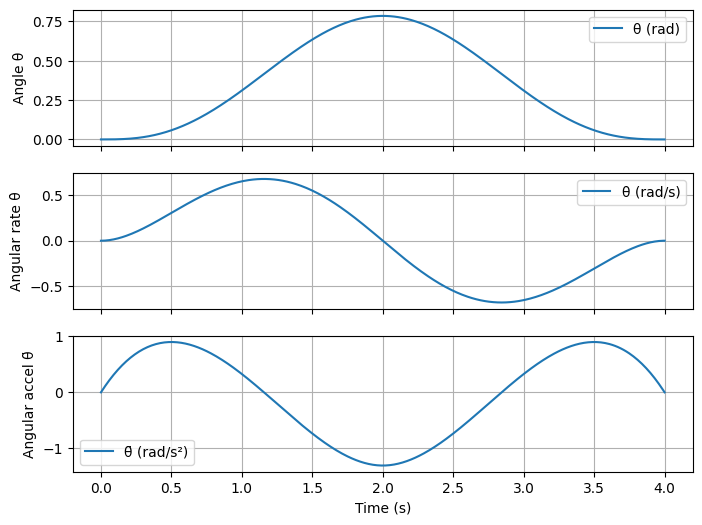

In [7]:
waypoints = [0.0, np.pi/4, 0.0]
T_segments = [2.0, 2.0]
traj = plan_pendulum_quintic(
    waypoints=waypoints,
    T_segments=T_segments,
    v_start=0.0, a_start=0.0,   # start at rest
    v_end=0.0,   a_end=0.0,     # end at rest
    num_per_seg=200
)

# Plot position, velocity, acceleration
fig, axs = plt.subplots(3, 1, figsize=(8,6), sharex=True)
axs[0].plot(traj["t"], traj["theta"], label="θ (rad)")
axs[1].plot(traj["t"], traj["dtheta"], label="θ̇ (rad/s)")
axs[2].plot(traj["t"], traj["ddtheta"], label="θ̈ (rad/s²)")

axs[0].set_ylabel("Angle θ")
axs[1].set_ylabel("Angular rate θ̇")
axs[2].set_ylabel("Angular accel θ̈")
axs[2].set_xlabel("Time (s)")
for ax in axs: ax.legend(), ax.grid(True)
plt.show()

In [8]:
model.u
# traj['t']

Matrix([
[  theta_ref],
[ dtheta_ref],
[ddtheta_ref],
[          d]])

In [9]:
# Set disturbance to zero
d = np.zeros_like(traj["t"])

U_array = np.vstack([
    traj["theta"],    # theta_ref
    traj["dtheta"],   # dtheta_ref
    traj["ddtheta"],  # ddtheta_ref
    d                 # disturbance torque
])

res = model.simulate2(traj["t"], U_array, x0=None)

plt.plot(res['t'], res['x'].T, label=model.x)
plt.legend()
plt.grid()

for i in range(len(model.x)):
    plt.figure()
    plt.plot(res['t'], res['x'][i])
    plt.xlabel(model.x[i])
    plt.grid()

<lambdifygenerated-5>:7: RuntimeWarning: invalid value encountered in scalar divide
  return (omega, -Kd*omega/(l**2*m) + Ki*xi/(l**2*m) - Kp*theta/(l**2*m) + Kp*theta_ref/(l**2*m) + c*dtheta_ref/(l**2*m) - c*omega/(l**2*m) + d/(l**2*m) + ddtheta_ref - g*sin(theta)/l + g*sin(theta_ref)/l, -theta + theta_ref)


AttributeError: 'list' object has no attribute 'T'

In [ ]:
# Obtain cartesian coordinates from theta.
cart_x = np.array(np.sin(res['x'][0]))
cart_y = np.array(-np.cos(res['x'][0]))

## Animation

In [ ]:
# Set up the figure and axis
from IPython.display import HTML
import matplotlib.animation as animation
fig, ax = plt.subplots()
line, = ax.plot([], [], 'b-', lw=2)
point, = ax.plot([], [], 'ro')
ax.set_xlim(np.min(cart_x) - 0.1, np.max(cart_x) + 0.1)
ax.set_ylim(np.min(cart_y) - 0.1, np.max(cart_y) + 0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Pendulum')

# Initialization
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Animation update function
def update(frame):
    line.set_data(cart_x[:frame], cart_y[:frame])
    point.set_data([cart_x[frame]], [cart_y[frame]])
    return line, point

ani = animation.FuncAnimation(
    fig, update, frames=len(cart_x), init_func=init, blit=True, interval=0.01*1000
)

ani.save('phase_animation.mp4', writer='ffmpeg', fps=int(1/0.01))
# or:
# ani.save('phase_animation.gif', writer='pillow', fps=int(1/dt))
HTML(ani.to_jshtml())  # <-- This will display the animation inline!

## Plot with disturbance - same ref trajectory

In [ ]:
# Set disturbance
dist = 0.1
d_array = dist * np.sign(np.sin(np.pi*traj["t"]))

U_array = np.vstack([
    traj["theta"],    # theta_ref
    traj["dtheta"],   # dtheta_ref
    traj["ddtheta"],  # ddtheta_ref
    d_array           # disturbance torque
])

res_dist = model.simulate2(traj["t"], U_array, x0=None)

plt.plot(res_dist['t'], res_dist['x'].T, label=model.x)
plt.legend()
plt.grid()

for i in range(len(model.x)):
    plt.figure()
    plt.plot(res_dist['t'], res_dist['x'][i])
    plt.xlabel(model.x[i])
    plt.grid()
    
# Obtain cartesian coordinates from theta.
cart_x_dist = np.array(np.sin(res_dist['x'][0]))
cart_y_dist = np.array(-np.cos(res_dist['x'][0]))

In [ ]:
# Set up the figure and axis
from IPython.display import HTML
import matplotlib.animation as animation
fig, ax = plt.subplots()
line, = ax.plot([], [], 'b-', lw=2)
point, = ax.plot([], [], 'ro')
ax.set_xlim(np.min(cart_x_dist) - 0.1, np.max(cart_x_dist) + 0.1)
ax.set_ylim(np.min(cart_y_dist) - 0.1, np.max(cart_y_dist) + 0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Pendulum')

# Initialization
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Animation update function
def update(frame):
    line.set_data(cart_x_dist[:frame], cart_y_dist[:frame])
    point.set_data([cart_x_dist[frame]], [cart_y_dist[frame]])
    return line, point

ani = animation.FuncAnimation(
    fig, update, frames=len(cart_x_dist), init_func=init, blit=True, interval=0.01*1000
)

ani.save('phase_animation.mp4', writer='ffmpeg', fps=int(1/0.01))
# or:
# ani.save('phase_animation.gif', writer='pillow', fps=int(1/dt))
HTML(ani.to_jshtml())  # <-- This will display the animation inline!

## Plot with disturbance against no dist

In [ ]:
for i in range(len(model.x)):
    plt.figure()
    plt.plot(res['t'], res['x'][i], label = "ref")
    plt.plot(res_dist['t'], res_dist['x'][i], label = "dist")
    # plt.plot(traj['t'], traj['theta'])
    plt.legend()
    plt.xlabel(model.x[i])
    plt.grid()

In [ ]:
err_theta = res_dist['x'][0] - res['x'][0]
err_dtheta = res_dist['x'][1] - res['x'][1]
plt.plot(err_theta, err_dtheta)

## Compute Dynamics and Jacobian

In [ ]:
x_dot = sympy.Matrix([xi for xi in model.sol_x_dot.subs(model.c0)])
omega_ref = sp.Symbol("omega_ref")
alpha_ref = sp.Symbol("alpha_ref")
x_dot = x_dot.subs({'dtheta_ref': omega_ref})
x_dot = x_dot.subs({'ddtheta_ref': alpha_ref})
x_dot.simplify()
display(Math(r"\dot{x} = " + sp.latex(x_dot)))

## Put in form
$$
\dot{x} = f(x,t) + B d
$$


In [ ]:
f = sp.simplify(x_dot.subs({model.u[3]: 0})) # Closed loop dynamics
B_u = sp.simplify(x_dot - f)   # Disturbance
B = B_u.subs({'d': 1})
display(Math(r"\dot{x} = " + sp.latex(f) + "+" + sp.latex(B) + "d"))
print(sp.latex(B))

## Compute Jacobian

In [ ]:
J = f.jacobian(model.x)
print(sp.latex(J))
display(J)
J = J.subs(model.p0)
B = B.subs(model.p0)
display(J)


# Solve M(t) as a polynomial
# Polynomial Contraction Metric (Sampled, Polytopic) — LMI Formulation

Given time samples $\{t_k\}_{k=0}^K$, contraction rate $\alpha>0$, input gain $\mu\ge 0$, disturbance matrix $B\in\mathbb{R}^{n\times m}$, and a polytopic Jacobian set $\mathcal{J}=\operatorname{conv}\{J^{(1)},\ldots,J^{(L)}\}$.

## 1) Metric parameterization
Define a polynomial (symmetric) metric:
$$
M(t)=\sum_{r=0}^{R} M_r\, t^r,\qquad M_r=M_r^\top.
$$

Time derivative:
$$
\dot M(t)=\sum_{r=1}^{R} r\, t^{r-1} M_r.
$$

Per-sample definitions:
$$
M_k \equiv M(t_k),\qquad \dot M_k \equiv \dot M(t_k).
$$

## 2) Decision variables
Optimize over the symmetric matrices $\{M_r\}_{r=0}^{R}$.

## 3) Per-sample Jacobian along the reference
At each sample time:
$$
J_k \;\equiv\; \left.\frac{\partial f}{\partial x}(x,t)\right|_{x=x_{\mathrm{ref}}(t_k),\, t=t_k},
\qquad
J_k \in \operatorname{conv}\{J_k^{(1)},\ldots,J_k^{(L)}\}.
$$

## 4) Sampled LMIs (robust over the polytope)
For each $k$ and each vertex $J_k^{(\ell)}$:
$$
\begin{bmatrix}
M_k J_k^{(\ell)} + J_k^{(\ell)\!\top} M_k + \dot M_k + \alpha M_k & M_k B\\[4pt]
B^\top M_k & -\alpha \mu\, I
\end{bmatrix}
\preceq 0,
\qquad
M_k \succeq \varepsilon I\;(\varepsilon>0).
$$


In [ ]:
def build_problem(J_by_time, B, t, k, eps=1e-6):
    #time normalize
    t = np.asarray(t, float)
    T = t[-1]-t[0]
    t = (t - t[0]) / T
    B = T*np.asarray(B, float)
    
    n, m = J_by_time[0][0].shape[0], B.shape[1]
    I_n, I_m = np.eye(n), np.eye(m)
    c_cap = 20

    # variables & parameter
    M_coefs = [cp.Variable((n,n), symmetric=True, name=f"M_{r}") for r in range(k)]
    mu      = cp.Variable(nonneg=True, name="mu")
    alpha   = cp.Parameter(nonneg=True, name="alpha")

    def M_of_t(ti):   return sum((ti**r) * M_coefs[r] for r in range(k))
    def Mdot_of_t(ti):return sum(r*(ti**(r-1)) * M_coefs[r] for r in range(1,k)) if k>1 else 0

    cons = []
    for i, Ji_list in enumerate(J_by_time):
        Mi, Mdot = M_of_t(t[i]), Mdot_of_t(t[i])
        cons += [Mi >> I_n, Mi << c_cap * I_n]     # PD
        # if i == 0:
        #     cons += [cp.trace(Mi) == n]             # fix scale once

        for Ji in Ji_list:
            Ji = T*np.asarray(Ji, float)
            S  = Ji.T @ Mi + Mi @ Ji + Mdot + alpha*Mi
            S  = 0.5*(S + S.T)                      # kill asymmetry
            MB = Mi @ B
            cons += [cp.bmat([[S, MB],
                              [MB.T, -alpha*mu*I_m]]) << 0]

    prob = cp.Problem(cp.Minimize(mu), cons)
    return prob, alpha, mu, M_coefs


In [ ]:
def get_ref_jacobians(J, traj, idx, err_theta):
    ref_jacobians = []
    for i in idx:
        ref_theta = traj['theta'][i]
        J_ref_k = []
        J_ref_k.append(J.subs({'theta': ref_theta + err_theta}))
        J_ref_k.append(J.subs({'theta': ref_theta - err_theta}))               
        ref_jacobians.append(J_ref_k)
    return ref_jacobians
    

In [ ]:
# Initialize problem
# Number of points to compute the ellipse at
num_samples = 10
# Get indices for the sample
idx = np.round(np.linspace(0, len(traj['t']) - 1, num_samples)).astype(int)
times = [traj['t'][i] for i in idx]


# Guess invariant set size and find corresponding polytopic bound for J around the reference trajectory
err_theta = 0.1
jacobian_polytopes = get_ref_jacobians(J, traj, idx, err_theta)
prob, alpha_par, mu_var, M_vars = build_problem(jacobian_polytopes, B, times, num_samples)
def mu_of(alpha):
    alpha_par.value = float(alpha)
    prob.solve(solver=cp.SCS, warm_start=False, eps=1e-6, max_iters=8000, verbose=False)
    if prob.status in ("optimal", "optimal_inaccurate"):
        print(f'alpha: {alpha}, mu: {mu_var.value}')
        return float(mu_var.value)
    return 1e6  # penalty if infeasible

# coarse sweep to bracket
candidates = np.logspace(-1, 1, 15)  # 1e-8 … 10
vals = np.array([mu_of(a) for a in candidates])
finite = np.isfinite(vals) & (vals < 1e5)
if not finite.any():
    raise RuntimeError("No feasible α in the scanned range.")

# bracket around the best coarse point
j = np.argmin(np.where(finite, vals, np.inf))
a_lo = candidates[max(0, j-1)]
a_hi = candidates[min(len(candidates)-1, j+1)]

# refine with fminbound on [a_lo, a_hi]
alpha_star = fminbound(mu_of, a_lo, a_hi, xtol=1e-3)  # tighten xtol if needed
mu_star = mu_of(alpha_star)

print(f"best α ≈ {alpha_star:.4g},  μ(α) ≈ {mu_star:.6g}")
M_coefs = [np.array(Mr.value) for Mr in M_vars]
# print(M_coefs)

## Verify solution for all points
### Certification of \(M(t)\) over \([0,1]\)

To ensure the block LMI holds for all \(t \in [0,1]\):

1. **Polynomial metric.**  
   We parameterize \(M(t) = M_0 + M_1 t + M_2 t^2\), so \(\dot M(t)\) is exact.

2. **Polytopic Jacobian bound.**  
   We are still using the polytopic jacobian bound, inserting x(t) +/- eps. we only need to check the LMI at its vertices.

3. **Time grid + Lipschitz margin.**  
   - Compute the minimum eigenvalue margin $m$ of the LMI on a grid $ t_i = i/N $.  
   - Upper bound a Lipschitz constant ($L \ge \sup_t \|\tfrac{d}{dt}\mathcal{L}(t)\|_2\ $).  
   - If $(m > \tfrac{Lh}{2})$ with step $(h=1/N)$, the LMI holds on the whole interval.


In [ ]:
J

In [ ]:
# Created by chatgbt. Need to check!
import sympy as sp
import numpy as np

def max_bounds_M(M_coefs, interval=(0.0, 1.0)):
    """
    Certified upper bounds for a matrix polynomial M(t) = Σ_r t^r M_r over t ∈ [a,b].
    M_coefs: list of (n×n) numeric arrays [M0, M1, ..., Mk]
    Returns dict with:
      - entry_sup:  (n×n) matrix of sup_{t∈[a,b]} |M_ij(t)|
      - frob_sup:   upper bound on sup ||M(t)||_F
      - spectral_sup_upper: upper bound on sup ||M(t)||_2  (via Frobenius)
      - eigmax_sup_upper:   upper bound on sup λ_max(M(t)) (Gershgorin; useful if M is symmetric)
    """
    a, b = map(float, interval)
    t = sp.symbols('t', real=True)
    n = np.asarray(M_coefs[0]).shape[0]

    # Build sympy matrix M(t) = Σ t^r M_r
    Ms = [sp.Matrix(mr) for mr in M_coefs]
    M_t = sum([(t**r) * Ms[r] for r in range(len(Ms))], sp.zeros(n, n))
    # Helper: certified sup of |p(t)| for polynomial p on [a,b]
    def sup_abs_poly_on_interval(p):
        p = sp.simplify(sp.expand(p))
        dp = sp.diff(p, t)
        cand = [a, b]
        if dp != 0:
            # all real critical points of dp in [a,b]
            for r in sp.nroots(dp):
                r = complex(r)
                if abs(r.imag) < 1e-14 and a <= r.real <= b:
                    cand.append(float(r.real))
        vals = [abs(sp.N(p.subs(t, c))) for c in cand]
        return float(max(vals))

    # Entrywise sup |M_ij(t)|
    entry_sup = np.zeros((n, n), dtype=float)
    for i in range(n):
        for j in range(n):
            entry_sup[i, j] = sup_abs_poly_on_interval(M_t[i, j])

    # Frobenius sup upper bound and spectral sup upper bound
    frob_sup = float(np.sqrt(np.sum(entry_sup**2)))
    spectral_sup_upper = frob_sup  # since ||·||_2 ≤ ||·||_F

    # Gershgorin upper bound for sup λ_max(M(t)) (good when M is symmetric)
    # sup row-sum bound: sup M_ii + sum_{j≠i} sup |M_ij|
    row_bounds = []
    for i in range(n):
        diag_sup = sup_abs_poly_on_interval(M_t[i, i])  # if M_ii can be negative, this is conservative but safe
        off_sum = float(np.sum(entry_sup[i, :]) - entry_sup[i, i])
        row_bounds.append(diag_sup + off_sum)
    eigmax_sup_upper = float(max(row_bounds))

    return {
        "entry_sup": entry_sup,
        "frob_sup": frob_sup,
        "spectral_sup_upper": spectral_sup_upper,
        "eigmax_sup_upper": eigmax_sup_upper,
    }


In [ ]:
import sympy as sp
import numpy as np
# Written by chatgbt. Need to verify!
def _sup_abs_poly_on_interval(p, var, a, b):
    """Certified sup_{var∈[a,b]} |p(var)| for a univariate polynomial p(var)."""
    p = sp.simplify(sp.expand(p))
    dp = sp.diff(p, var)
    cand = [a, b]
    if dp != 0:
        for r in sp.nroots(dp):
            r = complex(r)
            if abs(r.imag) < 1e-14 and a <= r.real <= b:
                cand.append(float(r.real))
    return float(max(abs(sp.N(p.subs(var, c))) for c in cand))

def bounds_from_Jtau(J_tau, theta_tau, tau=sp.symbols('tau', real=True), interval=(0.0, 1.0)):
    """
    Certified upper bounds on sup_{τ∈[a,b]} ||J(τ)||_F and ||dJ/dτ(τ)||_F.

    Inputs
    ------
    J_tau     : SymPy Matrix of J with θ already substituted (e.g., J.subs(theta, theta_tau±eps))
    theta_tau : SymPy polynomial for θ(τ) (used only to get sup |θ̇|)
    tau       : SymPy symbol for normalized time
    interval  : (a,b) sub-interval in τ

    Returns
    -------
    (J_F_sup, Jdot_F_sup) as floats (certified upper bounds).
    """
    a, b = map(float, interval)

    # sup |θ̇(τ)| on [a,b] (exact for polynomial)
    dtheta_tau = sp.diff(theta_tau, tau)
    dtheta_sup = _sup_abs_poly_on_interval(dtheta_tau, tau, a, b)

    # Collect ALL trig atoms (with any argument), so replacement always matches
    cos_atoms = list(J_tau.atoms(sp.cos))
    sin_atoms = list(J_tau.atoms(sp.sin))

    # ----- sup ||J(τ)||_F -----
    # Replace every cos(⋅) ∈ cos_atoms with c ∈ {±1} and every sin(⋅) ∈ sin_atoms with s ∈ {±1 or 0}.
    # (If your J only uses cos, {±1,0} on sin is harmless and conservative.)
    def frob_const(M):
        return float(np.sqrt(np.sum(np.array(M, dtype=float)**2)))

    J_F_sup = 0.0
    cos_choices = [+1, -1] if cos_atoms else [0]
    sin_choices = [+1, -1] if sin_atoms else [0]
    for c_val in cos_choices:
        for s_val in sin_choices:
            sub = {atom: c_val for atom in cos_atoms}
            sub.update({atom: s_val for atom in sin_atoms})
            Jb = sp.simplify(J_tau.subs(sub))
            # Jb should be constant now (no trig left); if τ remains it is only in *nontrig* coefficients,
            # but for J itself those are constants → OK to cast directly:
            if Jb.free_symbols:
                # Be safe: if any τ survived, it must be a constant polynomial; evaluate at endpoints.
                # This path shouldn't trigger for your pendulum J.
                J_F_sup = max(J_F_sup,
                               max(frob_const(Jb.subs(tau, a)),
                                   frob_const(Jb.subs(tau, b))))
            else:
                J_F_sup = max(J_F_sup, frob_const(Jb))

    # ----- sup ||J'(τ)||_F -----
    # Differentiate, then bound trig by ±1 and bound any remaining polynomial-in-τ terms exactly.
    Jdot_tau = sp.diff(J_tau, tau)
    if Jdot_tau == sp.zeros(*J_tau.shape):
        Jdot_F_sup = 0.0
    else:
        cos_atoms_d = list(Jdot_tau.atoms(sp.cos))
        sin_atoms_d = list(Jdot_tau.atoms(sp.sin))
        cos_choices_d = [+1, -1] if cos_atoms_d else [0]
        sin_choices_d = [+1, -1] if sin_atoms_d else [0]

        # We also bound θ̇(τ) by its supremum where it appears multiplicatively.
        Jdot_F_sup = 0.0
        for c_val in cos_choices_d:
            for s_val in sin_choices_d:
                sub = {atom: c_val for atom in cos_atoms_d}
                sub.update({atom: s_val for atom in sin_atoms_d})
                # Replace θ̇(τ) *anywhere it appears* by dtheta_sup (safe upper bound in Frobenius)
                Jdb = sp.simplify(Jdot_tau.subs(sub).replace(dtheta_tau, dtheta_sup))

                # Now every entry of Jdb is a univariate polynomial in τ (or a constant).
                # Compute certified sup of the Frobenius norm via entrywise sups:
                entry_supsq = 0.0
                for i in range(Jdb.shape[0]):
                    for j in range(Jdb.shape[1]):
                        entry = sp.simplify(Jdb[i, j])
                        if entry.free_symbols:
                            sup_ij = _sup_abs_poly_on_interval(entry, tau, a, b)
                        else:
                            sup_ij = float(abs(entry))
                        entry_supsq += sup_ij**2
                Jdot_F_sup = max(Jdot_F_sup, float(np.sqrt(entry_supsq)))

    return J_F_sup, Jdot_F_sup


In [ ]:
sp.latex(J)

In [ ]:
import sympy as sp
import numpy as np

def verify_solution(M_coefs, mu, alpha, B, times, eps, J, traj_coefs, T_segments):
    # times & (optional) time normalization
    times = np.asarray(times, float)
    t0, tf = times[0], times[-1]
    T = tf - t0
    B = (T * np.asarray(B, float))

    tau = sp.symbols('tau', real=True)  # normalized time variable
    n = np.asarray(M_coefs[0]).shape[0]

    # Build M(tau) and Mdot(tau) from coefficient matrices M_r
    M_terms   = [ (tau**r)        * sp.Matrix(M_coefs[r]) for r in range(len(M_coefs)) ]
    Mdot_terms= [ (r*tau**(r-1))  * sp.Matrix(M_coefs[r]) for r in range(1, len(M_coefs))]
    Mddot_terms = [ (r*(r-1) * tau**(r-2)) * sp.Matrix(M_coefs[r]) for r in range(2, len(M_coefs)) ]

    M_tau   = sum(M_terms,    sp.zeros(n, n))
    Mdot_tau= sum(Mdot_terms, sp.zeros(n, n))
    Mddot_tau   = sum(Mddot_terms, sp.zeros(n, n))

    


    # Extract reference trajectory. This will be different for each segment, so verify for each segment
    last_end = 0
    for i,seg in enumerate(T_segments):
        rng = [last_end, last_end + seg/T]
        last_end += seg/T

        
        theta_ref_terms = [ (tau*T)**r * np.array(traj_coefs[i][r]) for r in range(len(traj_coefs[i]))]
        theta_ref = sum(theta_ref_terms)

        theta = sp.symbols('theta', real=True)
        # build theta_ref as a *SymPy* polynomial (avoid np.array; use float or sp.Float)
        theta_ref = sum(sp.Float(traj_coefs[i][r]) * (tau*T)**r for r in range(len(traj_coefs[i])))



        # rng = (a, b) is your sub-interval in τ-space
        a, b = rng
        k = len(M_coefs)
        Z = np.zeros_like(M_coefs[0])  # zero matrix for fallbacks
        
        # Build derivative coefficient lists correctly:
        # M'(τ) = Σ_{q=0}^{k-2} τ^q * (q+1) M_{q+1}
        Mdot_coefs  = [(q+1) * M_coefs[q+1]          for q in range(k-1)] if k > 1 else [Z]
        
        # M''(τ) = Σ_{p=0}^{k-3} τ^p * (p+2)(p+1) M_{p+2}
        Mddot_coefs = [(p+2)*(p+1) * M_coefs[p+2]    for p in range(k-2)] if k > 2 else [Z]
        
        # Now compute certified bounds on the sub-interval [a,b]
        bound_M     = max_bounds_M(M_coefs,     interval=(a, b))
        bound_Mdot  = max_bounds_M(Mdot_coefs,  interval=(a, b))
        bound_Mddot = max_bounds_M(Mddot_coefs, interval=(a, b))

        
        B_max = np.sqrt(B.T@B)[0][0]
        print(bound_M['frob_sup'])
        print(bound_Mdot['frob_sup'])
        print(bound_Mddot['frob_sup'])
        print(B_max)


        J_tau_max = J.subs(theta, theta_ref + eps)
        J_tau_min = J.subs(theta, theta_ref - eps)

        J_poly = [J_tau_max, J_tau_min]

        for J_tau in J_poly:
            # Construct LMI
            display(J_tau)
            Jdot_tau = sp.diff(J_tau, tau)   # derivative wrt normalized time
            J_F_sup, Jdot_F_sup = bounds_from_Jtau(J_tau, theta_ref, tau, interval=(a, b))

            print(J_F_sup, Jdot_F_sup)
            F_tau = Mdot_tau + J_tau.T@M_tau + M_tau@J_tau + alpha*M_tau - (1/(alpha*mu))*M_tau@B@B.T@M_tau
            display(F_tau)
        
eps = 0.1
traj_coefs = traj['coeffs']
verify_solution(M_coefs, mu_star, alpha_star,B, times, eps, J, traj_coefs, T_segments)

In [ ]:
def verify_solution_and_upper_L(M_coefs, mu, alpha, B, times, eps, J, traj_coefs, T_segments):
    """
    Computes a certified global upper bound L >= sup ||F'(τ)||_2 across the whole horizon,
    by taking the max over segments. Works in normalized time τ∈[0,1].
    Returns (L_global, L_per_segment) as floats/list.
    """
    times = np.asarray(times, float)
    t0, tf = times[0], times[-1]
    T = float(tf - t0)

    # Time-normalized setup
    B = T * np.asarray(B, float)      # consistent with using d/dτ
    BBt_2 = float(np.linalg.norm(B, 2)**2)  # ||BB^T||_2 = ||B||_2^2

    tau = sp.symbols('tau', real=True)
    n = np.asarray(M_coefs[0]).shape[0]

    # Build derivative coefficient lists for M', M''
    k = len(M_coefs)
    Z = np.zeros_like(M_coefs[0])
    Mdot_coefs  = [(q+1)     * M_coefs[q+1] for q in range(k-1)] if k > 1 else [Z]
    Mddot_coefs = [(p+2)*(p+1)* M_coefs[p+2] for p in range(k-2)] if k > 2 else [Z]

    # Segment loop in normalized τ
    L_per_segment = []
    theta = sp.symbols('theta', real=True)

    last_end = 0.0
    for i, seg in enumerate(T_segments):
        seg = float(seg)
        a, b = last_end, last_end + seg / T      # τ-interval for this segment
        last_end = b

        # θ_ref(τ) as a SymPy polynomial in τ (coeffs are in absolute t; t = τ T)
        theta_ref = sum(sp.Float(traj_coefs[i][r]) * (tau*T)**r for r in range(len(traj_coefs[i])))

        # Certified matrix polynomial bounds on [a,b]
        bound_M     = max_bounds_M(M_coefs,     interval=(a, b))
        bound_Mdot  = max_bounds_M(Mdot_coefs,  interval=(a, b))
        bound_Mddot = max_bounds_M(Mddot_coefs, interval=(a, b))
        M_F_sup   = float(bound_M['frob_sup'])
        Md_F_sup  = float(bound_Mdot['frob_sup'])
        Mdd_F_sup = float(bound_Mddot['frob_sup'])

        # Polytopic J vertices: θ = θ_ref ± ε  (safe here since θ ∈ [0, π/4] is monotone for cos)
        J_tau_max = J.subs(theta, theta_ref + float(eps))
        J_tau_min = J.subs(theta, theta_ref - float(eps))

        # Certified sups for J and J' on [a,b] at both vertices; take worst-case
        J_Fsup_max, Jp_Fsup_max = bounds_from_Jtau(J_tau_max, theta_ref + float(eps), tau, interval=(a, b))
        J_Fsup_min, Jp_Fsup_min = bounds_from_Jtau(J_tau_min, theta_ref - float(eps), tau, interval=(a, b))
        J_F_sup  = max(J_Fsup_max,  J_Fsup_min)
        Jp_F_sup = max(Jp_Fsup_max, Jp_Fsup_min)

        # Certified Lipschitz bound on this segment:
        # ||F'(τ)||_2 ≤ ||M''||_F + 2||J'||_F||M||_F + 2||J||_F||M'||_F + α||M'||_F + (2/(αμ))||BB^T||_2||M||_F||M'||_F
        L_seg = ( Mdd_F_sup
                + 2.0 * Jp_F_sup * M_F_sup
                + 2.0 * J_F_sup  * Md_F_sup
                + float(alpha) * Md_F_sup
                + (2.0 / (float(alpha) * float(mu))) * BBt_2 * M_F_sup * Md_F_sup )

        L_per_segment.append(float(L_seg))

    L_global = float(max(L_per_segment)) if L_per_segment else 0.0
    return L_global, L_per_segment

In [ ]:
eps = 0.1
traj_coefs = traj['coeffs']
L_global, L_per_segment = verify_solution_and_upper_L(M_coefs, mu_star, alpha_star,B, times, eps, J, traj_coefs, T_segments)

In [ ]:
import sympy as sp
import numpy as np

def certify_with_L(
    M_coefs,                 # list of (n,n) arrays: [M0, M1, ..., Mk]
    mu, alpha,               # scalars
    B, times,                # B: (n,m), times: arraylike (t0..tf)
    J_sym, traj_coefs,       # J(theta) as SymPy Matrix; traj_coefs: list of coeff lists per segment
    T_segments,              # list of segment durations that sum to tf - t0
    eps,                     # tube half-width in theta (radians)
    L_per_segment,           # list of per-segment Lipschitz bounds
    N0=200,                  # initial grid points per segment
    safety=1.15,             # safety factor on N requirement
    max_N=20000,             # cap on grid refinement
):
    """
    Uses per-segment Lipschitz bounds L_per_segment to certify F(s) ≺ 0 for all s∈[0,1]
    via the grid inequality m_i > 0.5*L_i*h_i on each segment.

    Returns dict:
      {
        "ok": bool,
        "segs": [
           {"i": idx, "s_interval": (a,b), "Delta": Δ, "L": L_i,
            "N": N_i, "h": h_i, "m_coarse": m0, "m_fine": mf,
            "worst_s": s*, "worst_eig": lambda_min_at_s*, "status": "..."}
        ],
        "message": str
      }
    """
    # --- normalization & precompute ---
    times = np.asarray(times, float)
    T_total = float(times[-1] - times[0])

    Bn = T_total * np.asarray(B, float)   # normalized-time scaling
    BBt = Bn @ Bn.T
    alpha = float(alpha); mu = float(mu)

    # fast polynomial evaluators for M(s) and M'(s)
    k = len(M_coefs)
    Mdot_coefs = [(q+1) * M_coefs[q+1] for q in range(k-1)] if k > 1 else [np.zeros_like(M_coefs[0])]

    def M_eval(s_val):
        return sum((s_val**r) * M_coefs[r] for r in range(k))

    def Mdot_eval(s_val):
        return sum((s_val**q) * Mdot_coefs[q] for q in range(len(Mdot_coefs)))

    # J(theta) → numpy
    theta_sym = sp.symbols('theta', real=True)  # keep plain ASCII name
    J_fun = sp.lambdify(theta_sym, J_sym, 'numpy')

    # theta_ref(s) numeric (coeffs are in absolute time t; t = s * T_total)
    def make_theta_ref_num(coeff_list):
        coeffs = [float(c) for c in coeff_list]
        def th(s_scalar):
            t_abs = s_scalar * T_total
            return sum(coeffs[r] * (t_abs**r) for r in range(len(coeffs)))
        return th

    # --- loop over segments with grid test ---
    seg_results = []
    ok_all = True
    last_end = 0.0

    for i, (seg_len, L_i) in enumerate(zip(T_segments, L_per_segment)):
        a, b = last_end, last_end + float(seg_len) / T_total
        Delta = b - a
        last_end = b

        theta_ref_num = make_theta_ref_num(traj_coefs[i])

        # margin at s for both J vertices
        def margin_at_s(s_scalar):
            M_s   = M_eval(s_scalar)
            Mdot  = Mdot_eval(s_scalar)
            th_p  = theta_ref_num(s_scalar) + eps
            th_m  = theta_ref_num(s_scalar) - eps
            Jp = np.array(J_fun(th_p), dtype=float)
            Jm = np.array(J_fun(th_m), dtype=float)

            def lam_min_F(Jnum):
                S = Mdot + Jnum.T @ M_s + M_s @ Jnum + alpha * M_s
                F = S - (1.0/(alpha*mu)) * (M_s @ BBt @ M_s)
                F = 0.5*(F + F.T)
                return np.linalg.eigvalsh(F).min()

            lp = lam_min_F(Jp)
            lm = lam_min_F(Jm)
            lam_min = min(lp, lm)
            print(lam_min)
            return -lam_min, lam_min  # margin m = -λ_min

        # coarse grid
        N = int(N0)
        h = Delta / N
        s_grid = np.linspace(a, b, N+1)
        m0 = np.inf
        worst_s = None
        worst_eig = None
        sample_violation = False

        for s_val in s_grid:
            m_here, lam_here = margin_at_s(s_val)
            if lam_here >= 0:  # not negative definite at a sample
                sample_violation = True
                worst_s, worst_eig, m0 = s_val, lam_here, min(m0, m_here)
                break
            if m_here < m0:
                m0 = m_here
                worst_s, worst_eig = s_val, lam_here

        if sample_violation:
            seg_results.append({
                "i": i, "s_interval": (a,b), "Delta": Delta, "L": float(L_i),
                "N": N, "h": h, "m_coarse": float(m0),
                "m_fine": None, "worst_s": float(worst_s), "worst_eig": float(worst_eig),
                "status": "sample_violation"
            })
            ok_all = False
            continue

        # required N from inequality m > 0.5 * L * h  ⇒  h < 2m/L
        if m0 <= 0:
            N_req = max_N + 1
        else:
            N_req = int(np.ceil(safety * (L_i * Delta) / (2.0 * m0)))
        N = max(N, N_req)
        if N > max_N:
            seg_results.append({
                "i": i, "s_interval": (a,b), "Delta": Delta, "L": float(L_i),
                "N": N_req, "h": Delta/max(1,N_req), "m_coarse": float(m0),
                "m_fine": None, "worst_s": float(worst_s), "worst_eig": float(worst_eig),
                "status": "refine_limit"
            })
            ok_all = False
            continue

        # fine grid
        h = Delta / N
        s_grid = np.linspace(a, b, N+1)
        mf = np.inf
        worst_s_f = None
        worst_eig_f = None
        sample_violation = False

        for s_val in s_grid:
            m_here, lam_here = margin_at_s(s_val)
            if lam_here >= 0:
                sample_violation = True
                worst_s_f, worst_eig_f, mf = s_val, lam_here, min(mf, m_here)
                break
            if m_here < mf:
                mf = m_here
                worst_s_f, worst_eig_f = s_val, lam_here

        if sample_violation:
            seg_results.append({
                "i": i, "s_interval": (a,b), "Delta": Delta, "L": float(L_i),
                "N": N, "h": h, "m_coarse": float(m0),
                "m_fine": float(mf), "worst_s": float(worst_s_f), "worst_eig": float(worst_eig_f),
                "status": "sample_violation"
            })
            ok_all = False
            continue

        certified = (mf > 0.5 * L_i * h)
        ok_all &= certified
        seg_results.append({
            "i": i, "s_interval": (a,b), "Delta": Delta, "L": float(L_i),
            "N": N, "h": h, "m_coarse": float(m0), "m_fine": float(mf),
            "worst_s": float(worst_s_f), "worst_eig": float(worst_eig_f),
            "status": "certified" if certified else "needs_more_refine"
        })

    msg = "Certified on all segments." if ok_all else "Certification failed or needs refinement; see details."
    return {"ok": ok_all, "segs": seg_results, "message": msg}


In [ ]:
res = certify_with_L(
    M_coefs=M_coefs,
    mu=mu_star,
    alpha=alpha_star,
    B=B,
    times=times,
    J_sym=J,
    traj_coefs=traj['coeffs'],
    T_segments=T_segments,
    eps=0.1,
    L_per_segment=L_per_segment,
    N0=300,          # or whatever you like
    safety=1.2,
    max_N=20000
)
print(res["message"])
for seg in res["segs"]:
    print(seg)


In [ ]:
L_per_segment

In [ ]:
# 2) evaluate M(t) and Mdot(t)
def eval_M(M_coefs, t, times):
    normalized_time = (t - times[0]) / max(times[-1]-times[0], 1e-12)
    # print(normalized_time)
    return sum((normalized_time**r) * M for r, M in enumerate(M_coefs))


eval_M(M_coefs, 4, times)

In [ ]:
def plot_ellipse(M, ax, label="", color = 'blue', alpha=1):
    """Plot an ellipse defined by x^T M x = 1."""
    # Compute eigenvalues and eigenvectors of P
    eigvals, eigvecs = np.linalg.eig(M)

    # Compute the angle of rotation of the ellipse
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))

    # Compute the semi-major and semi-minor axes lengths
    width = 2 / np.sqrt(eigvals[0])
    height = 2 / np.sqrt(eigvals[1])

    # Create an ellipse patch
    ellipse = Ellipse(xy=(0, 0), width=width, height=height, angle=angle, fill=True, alpha=alpha, label=label, color=color)
    if label != "":
        ax.legend([ellipse], [label])

    # Add the ellipse to the plot
    ax.add_artist(ellipse)
    return ellipse

In [ ]:
def proj_M_theta_omega(M):
    M = np.asarray(M, float)
    M11 = M[:2, :2]
    M12 = M[:2, 2:]
    M22 = M[2:, 2:]
    # Use solve for stability
    X = np.linalg.solve(M22, M12.T)
    Mproj = M11 - M12 @ X
    # Symmetrize to kill tiny asymmetry
    return 0.5*(Mproj + Mproj.T)




dist = 0.1
time = 4
M_t = eval_M(M_coefs, time, times)
print(M_t)
# Example for y = [theta, omega] as coords 0 and 1:
M_proj = proj_M_theta_omega(M_t)
print(M_proj)
ax = plt.gca()
ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-0.25, 0.25)
T = times[-1]-times[0]
mu_phys = mu_star / T 
plot_ellipse(M_proj/(mu_phys*dist**2), ax)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from IPython.display import HTML
import matplotlib.animation as animation

def _ellipse_params_from_Q(Q):
    """
    Given SPD 2x2 Q for set {x: x^T Q x <= 1},
    return (width, height, angle_degrees) for a Matplotlib Ellipse.
    """
    vals, vecs = np.linalg.eigh(Q)
    vals = np.maximum(vals, 1e-16)
    # semi-axes a_i = 1/sqrt(lambda_i); widths are 2*a
    a = 1.0 / np.sqrt(vals)
    # major axis corresponds to the smaller eigenvalue of Q (larger semi-axis)
    order = np.argsort(vals)  # ascending
    v_major = vecs[:, order[0]]
    angle = np.degrees(np.arctan2(v_major[1], v_major[0]))
    width, height = 2*a[order[0]], 2*a[order[1]]
    return width, height, angle

def animate_metric_ellipse(times,
                           M_coefs,
                           eval_M,           # callable: M_t = eval_M(M_coefs, t, times)
                           proj_M_theta_omega,  # callable: M_proj,_,_ = proj_shape_axes(M_t, idx_pair=[0,1])
                           mu, dist,
                           xlim=(-0.25, 0.25),
                           ylim=(-0.25, 0.25),
                           title=r'Ellipse of $x^\top M_{\rm proj}(t) x \le \mu\,{\rm dist}^2$'):
    """
    Animates the time-varying ellipse corresponding to Q(t) = M_proj(t) / (mu*dist^2).
    """
    times = np.asarray(times)
    N = len(times)
    denom = max(mu*(dist**2), 1e-16)  # guard for dist=0 or mu=0

    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)
    ax.set_xlabel(r'$\theta-\theta_{\rm ref}$')
    ax.set_ylabel(r'$\omega-\dot\theta_{\rm ref}$')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

    # Ellipse patch we’ll update in place
    ell = Ellipse((0,0), 0, 0, angle=0, fill=False, ls='--', lw=2, label='bound set')
    ax.add_patch(ell)
    txt = ax.text(0.02, 0.98, '', transform=ax.transAxes, va='top')

    def init():
        ell.set_visible(False)
        txt.set_text('')
        return ell, txt

    def update(k):
        t = float(times[k])
        M_t = eval_M(M_coefs, t, times)
        M_proj= proj_M_theta_omega(M_t)

        Q = M_proj / denom  # your convention: plot_ellipse(M_proj/(mu*dist**2))
        width, height, angle = _ellipse_params_from_Q(Q)

        ell.center = (0.0, 0.0)
        ell.width, ell.height, ell.angle = width, height, angle
        ell.set_visible(True)

        txt.set_text(f"t = {t:.3f}s")
        return ell, txt

    # choose interval from average dt (ms), default to ~real-time
    dt_est = float(np.mean(np.diff(times))) if N > 1 else 0.01
    interval_ms = max(1, int(1000*dt_est))

    ani = animation.FuncAnimation(fig, update, frames=N, init_func=init,
                                  blit=True, interval=interval_ms)
    return fig, ani


In [ ]:
time_array = np.arange(0,4,0.01)

In [ ]:
dist = 0.1
time = 2
M_t = eval_M(M_coefs, time, times)
print(M_t)
# Example for y = [theta, omega] as coords 0 and 1:
M_proj = proj_M_theta_omega(M_t)
print(M_proj)
ax = plt.gca()
ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-0.25, 0.25)
plot_ellipse(M_proj/(mu_phys*dist**2), ax)

In [ ]:
# Given: times, M_coefs, eval_M, proj_shape_axes, mu_star, dist

fig, ani = animate_metric_ellipse(time_array, M_coefs, eval_M, proj_M_theta_omega,
                                  mu=mu_phys, dist=dist,
                                  xlim=(-0.25, 0.25), ylim=(-0.3, 0.3),
                                  title='Time-varying ellipse M(t)/(mu*dist^2)')

# Save or display:
ani.save('metric_ellipse.mp4', writer='ffmpeg', fps=30)
HTML(ani.to_jshtml())


## Compare with simulation (Euclidean space with ellipse being at time shot)

In [ ]:
def square_wave(amp, f, phi, t):
    return amp*np.sign(np.sin(2*np.pi*f*t + phi))
    
dist = 0.1
freqs = [f/10 for f in range(10)]
# phis = [phi/10 for phi in range(5)]
phis = [0]

ax = plt.gca()
for f in freqs:
    for phi in phis:
        dist_input = square_wave(dist, f, phi, traj['t'])
        U_array = np.vstack([
            traj["theta"],    # theta_ref
            traj["dtheta"],   # dtheta_ref
            traj["ddtheta"],  # ddtheta_ref
            dist_input        # disturbance torque
        ])
        
        res_dist = model.simulate2(traj["t"], U_array, x0=None)
        
        err_theta = res_dist['x'][0] - traj['theta']
        err_dtheta = res_dist['x'][1] - traj['dtheta']

        # err_theta = res_dist['x'][0] - res['x'][0]
        # err_dtheta = res_dist['x'][1] - res['x'][1]
        ax.plot(err_theta, err_dtheta, label=f)


dist = 0.1
time = 3.8
M_t = eval_M(M_coefs, time, times)
M_t = M_t/(mu_phys*dist**2)
print(M_t)
# Example for y = [theta, omega] as coords 0 and 1:
M_proj= proj_M_theta_omega(M_t)
ax = plt.gca()
ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-0.25, 0.25)
ax.legend()
plot_ellipse(M_proj, ax)

## Compare with simulation (Time varying Metric space)

- Factor the metric:
  $$
  M(t) = H(t)^\top H(t)
  $$
  where $H(t)$ is any invertible square root of $M(t)$ (e.g., the Cholesky factor).

- Define the metric-frame error:
  $$
  z(t) = H(t)\,e(t)
  $$

- Then
  $$
  \|z(t)\|^2 = e(t)^\top M(t)\,e(t),
  $$
  so

  $$
  e(t)^\top M(t)\,e(t) \le 1 \iff \|z(t)\|\le 1.
  $$



In [ ]:
def square_wave(amp, f, phi, t):
    return amp * np.sign(np.sin(2*np.pi*f*t + phi))

dist = 0.1
freqs = [f/10 for f in range(1, 10)]   # skip 0 Hz
phis = [0.0]

ax = plt.gca()
for f in freqs:
    for phi in phis:
        dist_input = square_wave(dist, f, phi, traj['t'])
        U_array = np.vstack([
            traj["theta"],    # theta_ref
            traj["dtheta"],   # dtheta_ref
            traj["ddtheta"],  # ddtheta_ref
            dist_input        # disturbance torque
        ])

        res_dist = model.simulate2(traj["t"], U_array, x0=None)

        err_theta  = res_dist['x'][0] - traj['theta']
        err_dtheta = res_dist['x'][1] - traj['dtheta']
        e = np.vstack([err_theta, err_dtheta])  # (2, T)

        T = e.shape[1]
        z = np.zeros((2, T))                    # (2, T) so we can plot z[0,:], z[1,:]
        for i, ti in enumerate(traj['t']):
            M_t = eval_M(M_coefs, ti, times)
            M_t = 0.5*(M_t + M_t.T) / (mu_phys * dist**2)  # symmetrize + normalize
            M_t = proj_M_theta_omega(M_t)
            L = np.linalg.cholesky(M_t)          # M = L @ L.T
            H_t = L.T                             # M = H.T @ H
            z[:, i] = H_t @ e[:, i]    

        ax.plot(z[0, :], z[1, :], label=f"{f:.1f} Hz")

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.legend()
plot_ellipse(np.eye(2), ax)
